In [1]:
"""
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [3]:

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


In [4]:

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)


LinearRegression()

In [5]:

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


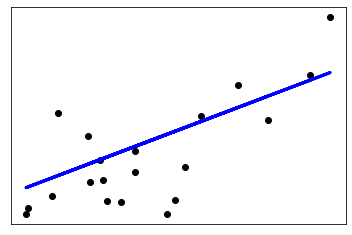

In [6]:

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [34]:
# https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

import numpy as np
model=make_pipeline(PolynomialFeatures(2),LinearRegression())
# fit to an order-3 polynomial data
#x = np.arange(5)
#y = 3 - 2 * x + x ** 2 - x ** 3

x = diabetes_X_train
y = diabetes_y_train

print(x.shape)
print(y.shape)

#model = model.fit(x, y)
#print(model.named_steps['linear'].coef_)

model.fit(x,y)

(422, 1)
(422,)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [23]:
result = model.predict(diabetes_X_test)

print(result)

[226.12616682 115.79520062 163.03172032 114.79572573 120.79604847
 157.98224483 236.38605211 121.79691272  99.83138959 123.7993359
 204.65578055  96.84477449 153.94683252 130.81511119  83.92685797
 171.12292223 137.84223292 137.84223292 189.3823116   84.9191545 ]


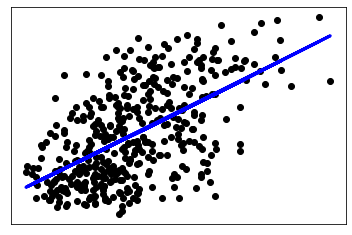

In [24]:
plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

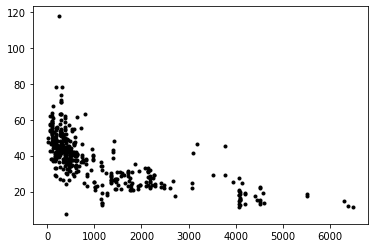

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

data = pd.read_csv('real_estate.csv')

plt.plot(data['X3 distance to the nearest MRT station'], data['Y house price of unit area'], 'k.')
plt.show()

In [42]:
xs = np.array(data['X3 distance to the nearest MRT station'])
ys = np.array(data['Y house price of unit area'])
print(xs.shape)
xs = xs.reshape((-1,1))
print(ys.shape)

(414,)
(414,)


In [51]:
models=make_pipeline(PolynomialFeatures(5),LinearRegression())
models.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

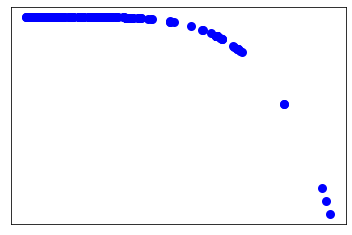

In [52]:
plt.scatter(xs, models.predict(xs), color='blue', linewidth=3)
#plt.plot(xs, models.predict(xs), 'k.-')


plt.xticks(())
plt.yticks(())

plt.show()

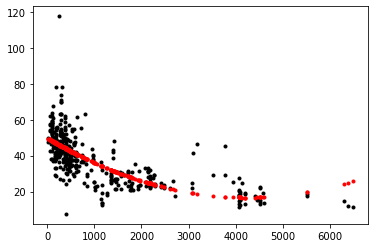

In [55]:
#x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
#y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
xs = np.array(data['X3 distance to the nearest MRT station'])
ys = np.array(data['Y house price of unit area'])
z = np.polyfit(xs, ys, 2)
p = np.poly1d(z)
#xp = np.linspace(-2, 6, 100)

_ = plt.plot(xs, ys, 'k.', xs, p(xs), 'r.')
#plt.ylim(-2, 2)
plt.show()